In [2]:
#Building a Rainfall Prediction Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df=pd.read_csv(url)
print(df.head())
#1:store a web address (URL) in a variable called url
#2:read the CSV file from the web and turn it into a DataFrame.
#3:peek at the first 5 rows to understand the structure.

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [5]:

print(df.shape)  #prints (number of rows,number of columns)
print(df.count()) # shows the number of non-missing values in each column.

(145460, 23)
Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64


In [6]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [7]:
df=df.dropna()  #removes all rows from the DataFrame df that contain any missing values (NaNs).
                #Even one NaN in any column will cause that row to be removed
print(df.shape)

(56420, 23)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [9]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [10]:
df=df.rename(columns={'RainToday':'RainYesterday',
                      'RainTomorrow':'RainToday'})
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainYesterday', 'RainToday'],
      dtype='object')


In [11]:
print(df["Location"].unique())

['Cobar' 'CoffsHarbour' 'Moree' 'NorfolkIsland' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Canberra' 'Sale' 'MelbourneAirport'
 'Melbourne' 'Mildura' 'Portland' 'Watsonia' 'Brisbane' 'Cairns'
 'Townsville' 'MountGambier' 'Nuriootpa' 'Woomera' 'PerthAirport' 'Perth'
 'Hobart' 'AliceSprings' 'Darwin']


In [12]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
print(df.shape)
print(df["Location"].unique())
#We still have 7557 records, which should be enough to build a reasonably good model.

(7557, 23)
['MelbourneAirport' 'Melbourne' 'Watsonia']


We expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.
There may be some variation with Year as well, but we'll leave that out for now. Let's engineer a Season feature from Date and drop Date afterward, since it is most likely less informative than season. An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the Date column.

In [13]:
def date_to_season(date):
    month=date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'
df['Date']=pd.to_datetime(df["Date"])
df["Season"]=df["Date"].apply(date_to_season)
df=df.drop(columns="Date")
print(df)

               Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
64191  MelbourneAirport     11.2     19.9       0.0          5.6       8.8   
64192  MelbourneAirport      7.8     17.8       1.2          7.2      12.9   
64193  MelbourneAirport      6.3     21.1       0.0          6.2      10.5   
64194  MelbourneAirport      8.1     29.2       0.0          6.4      12.5   
64195  MelbourneAirport      9.7     29.0       0.0          7.4      12.3   
...                 ...      ...      ...       ...          ...       ...   
80992          Watsonia      3.6     14.5       0.0          2.4       8.8   
80994          Watsonia      4.8     13.3       0.4          0.6       0.0   
80995          Watsonia      5.6     13.1       0.0          1.6       6.0   
80996          Watsonia      6.9     12.1       3.2          1.8       5.6   
80997          Watsonia      7.9     13.0       0.0          2.8       3.8   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Hu

In [14]:
#Define the feature and target dataframes
X= df.drop(columns='RainToday',axis=1)
y=df['RainToday']
print(X.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainYesterday', 'Season'],
      dtype='object')


In [15]:
# How balanced are the classes?
#Display the counts of each class
print(df.value_counts())

Location   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainYesterday  RainToday  Season
Watsonia   28.1     34.5     0.0       16.4         10.7      NNE          50.0           N           SW          19.0          19.0          31.0         44.0         1005.7       1006.6       7.0       6.0       29.6     27.8     No             No         Summer    1
Melbourne  2.3      15.2     0.0       1.0          8.6       NNE          31.0           N           N           15.0          15.0          87.0         43.0         1026.1       1022.1       1.0       3.0       3.9      13.9     No             No         Winter    1
           2.9      18.0     0.0       1.2          10.1      N            46.0           N           NNE         11.0          24.0          75.0         29.0         1023.8       1020.2       1

Stratify:
if your full dataset has:
90% Class A
10% Class B
Then:
The training set will also have ≈ 90% A, 10% B
The test set will also have ≈ 90% A, 10% B
This makes sure your model sees a balanced view of all classes, especially helpful for classification problems.

In [16]:
#splitting data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
#stratify=y: Ensures that the class distribution in y (target variable) is preserved in both train and test.
#Defining preprocessing transformers for numerical and categorical features
numerical_features=X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features= X_train.select_dtypes(include=['object','category']).columns.tolist()
print(numerical_features)
print(categorical_features)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainYesterday', 'Season']


In [17]:
#Defining separate transformers for both feature types
#and combining them into single preprocessing transformer
# Scale the numeric features
numerical_transformer= Pipeline(steps=[('scaler',StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore'))])

In [18]:
#combining the transformers into single preprocessing column transformer
preprocesser= ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,categorical_features)
])

In [19]:
#Creating a pipeline by combining the preprocessing with a RandomForestClassifier
pipeline= Pipeline(steps=[('preprocesser',preprocesser),
                          ('classifier', RandomForestClassifier(random_state=42))])

In [20]:
#Defining a parameter grid to use in a cross validation gridsearch model optimizer
para_grid= {
    'classifier__n_estimators':[50,100],
    'classifier__max_depth': [None, 10,20],
    'classifier__min_samples_split': [2,5]
}

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(estimator=pipeline, param_grid=para_grid, cv=cv, scoring='accuracy', verbose=2)  
grid_search.fit(X_train, y_train)
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_

In [22]:
test_score = grid_search.score(X_test,y_test )  
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.84


In [23]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8432539682539683

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.76      0.50      0.60       358

    accuracy                           0.84      1512
   macro avg       0.81      0.72      0.75      1512
weighted avg       0.83      0.84      0.83      1512



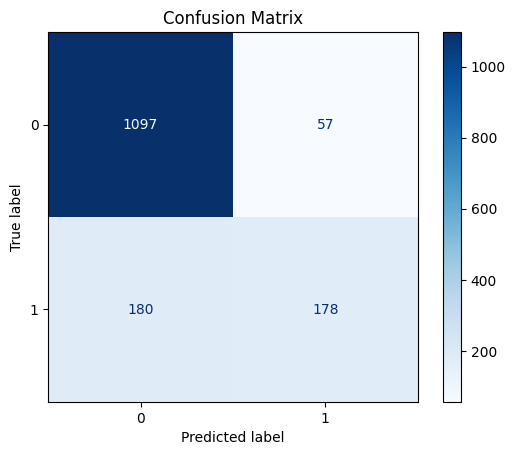

In [24]:
#plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

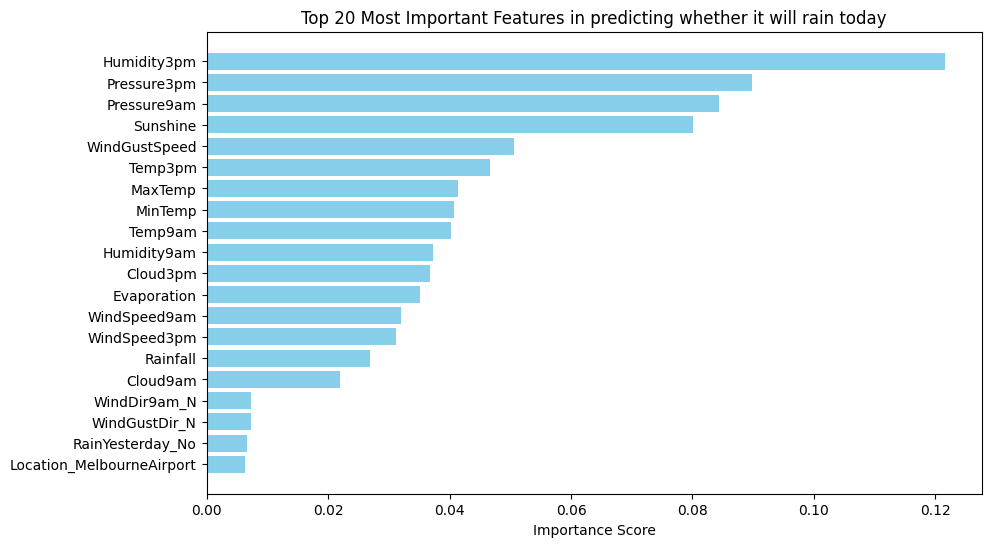

In [25]:
feature_names = numerical_features + list(grid_search.best_estimator_['preprocesser']
                                        .named_transformers_['cat']
                                        .named_steps['encode']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

In [30]:
#trying another model (Logistic Regression)
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
para_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = para_grid

# Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



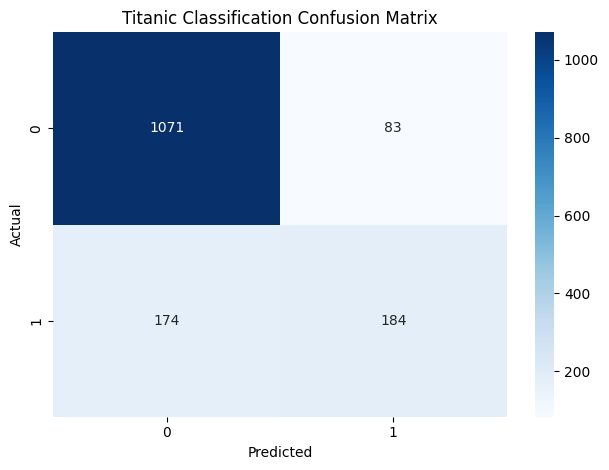

In [31]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()